In [1]:
#Import All Important Libraries
import librosa
import soundfile
import os, glob, pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
#function for extracting mfcc, chroma, and mel features from sound file
def extract_feature(file_name, mfcc, chroma, mel):
  with soundfile.SoundFile(file_name) as sound_file:
    X = sound_file.read(dtype="float32")
    sample_rate=sound_file.samplerate
    if chroma:
      stft=np.abs(librosa.stft(X))
    result=np.array([])
    if mfcc:
      mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
      result=np.hstack((result, mfccs))
    if chroma:
      chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
      result=np.hstack((result, chroma))
    if mel:
      mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
      result=np.hstack((result, mel))
  return result

In [3]:
#Define the motions dictionary
emotions = {
    '01':'neutral',
    '02':'calm',
    '03':'happy',
    '04':'sad',
    '05':'angry',
    '06':'fearful',
    '07':'disgust',
    '08':'surprised'
}

#Emotions we want to observe
observed_emotions = ['calm', 'happy', 'fearful', 'disgust']

In [4]:
#Load the data and extract features for each sound file
def load_data(test_size = 0.2):
  x, y = [], []
  print(0)
  for folder in glob.glob('./Datasets/Actor_*'):
    # print(0)
    print(folder)
    for file in glob.glob(folder + '/*.wav'):
      file_name = os.path.basename(file)
      emotion = emotions[file_name.split('-')[2]]
      if emotion not in observed_emotions:
        continue
      feature = extract_feature(file, mfcc = True, chroma = True, mel = True)
      x.append(feature)
      y.append(emotion)
  return train_test_split(np.array(x), y, test_size = test_size, random_state = 9)


In [5]:
x_train,x_test,y_train,y_test=load_data(test_size=0.2)

0
./Datasets/Actor_04
./Datasets/Actor_18
./Datasets/Actor_11
./Datasets/Actor_20
./Datasets/Actor_08
./Datasets/Actor_15
./Datasets/Actor_12
./Datasets/Actor_14
./Datasets/Actor_24
./Datasets/Actor_19
./Datasets/Actor_21
./Datasets/Actor_10
./Datasets/Actor_22
./Datasets/Actor_06
./Datasets/Actor_23
./Datasets/Actor_03
./Datasets/Actor_16
./Datasets/Actor_09
./Datasets/Actor_05
./Datasets/Actor_01
./Datasets/Actor_13
./Datasets/Actor_17
./Datasets/Actor_02
./Datasets/Actor_07


In [6]:
#Shape of train and test set and Number of features extracted
print((x_train.shape[0], x_test.shape[0]))
print(f'Features extracted: {x_train.shape[1]}')

(441, 111)
Features extracted: 180


In [7]:
#Initialise Multi Layer Perceptron Classifier
model = MLPClassifier(alpha = 0.01, batch_size = 256, epsilon = 1e-08, hidden_layer_sizes = (1000,), learning_rate = 'adaptive', max_iter = 500)

In [8]:
history=model.fit(x_train, y_train)

In [9]:
history

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(1000,),
              learning_rate='adaptive', max_iter=500)

In [10]:
#Predict for the test set
y_pred = model.predict(x_test)

In [11]:
#Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 96.40%


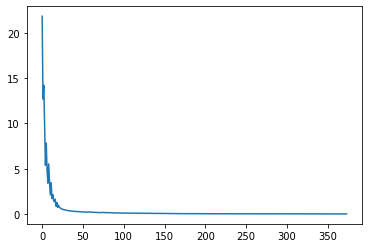

In [12]:
loss_plot=model.loss_curve_
plt.plot(loss_plot)
plt.show()